In [1]:
%matplotlib inline


import import_ipynb
from Experiment_final import get_settings, get_one_dt, get_dataset, get_q_batch, get_q_batches
import numpy as np
import matplotlib.pyplot as plt


importing Jupyter notebook from Experiment_final.ipynb
[['mix' '11' 'const']
 ['mix' '100' 'const']
 ['mix' '200' 'const']]
mix 11 const
mix 100 const
mix 200 const


In [2]:
def test_get_settings():
    is_val = True
    
    try:
        get_settings(1, 2, 3)
    except TypeError: is_val = is_val
    
    try:
        get_settings([], [2], [3])
    except Exception: is_val = is_val
        
    try:
        get_settings([1], [1], [1])
    except Exception: is_val = is_val
        
    settings, is_step = get_settings([1,2,3,4,5], [6], [7])
    is_val = is_val and (len(settings)==5) and not(is_step)
    
    settings, is_step = get_settings([6],[1,2,3,4,5], [7])
    is_val = is_val and (len(settings)==5) and not(is_step)
    
    settings, is_step = get_settings([6], [7], [1,2,3,4,5])
    is_val = is_val and (len(settings)==5) and (is_step)
    
    return is_val
    
test_get_settings()

True

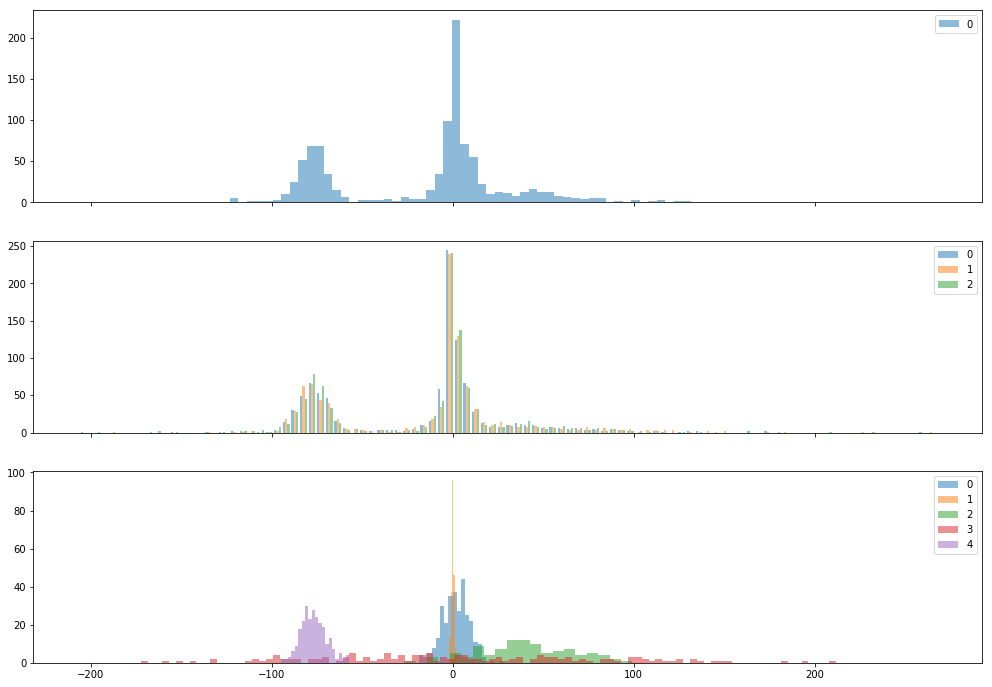

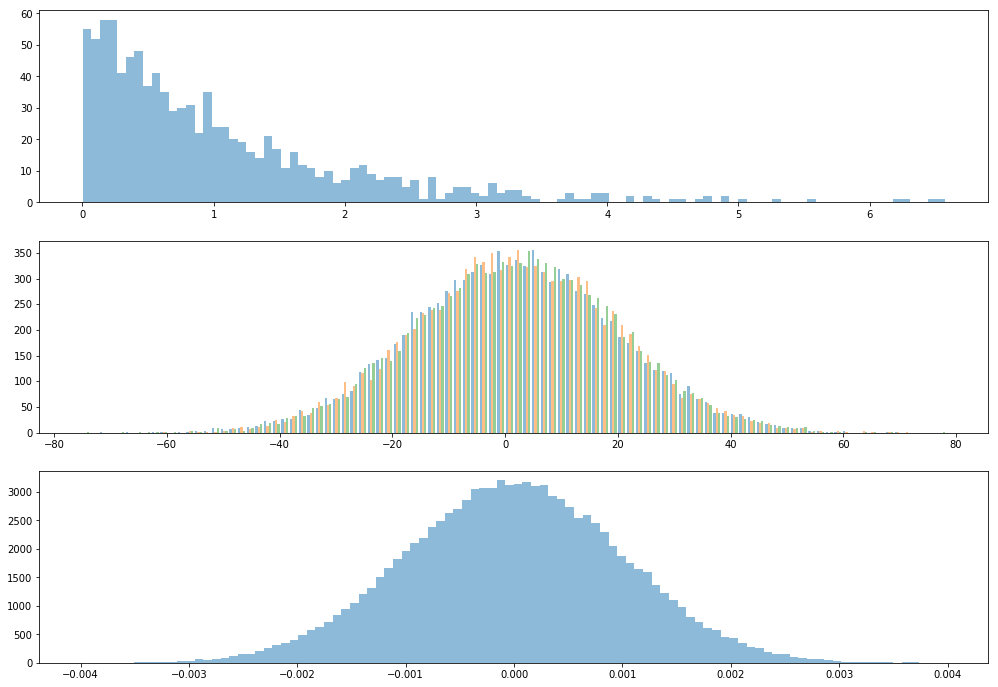

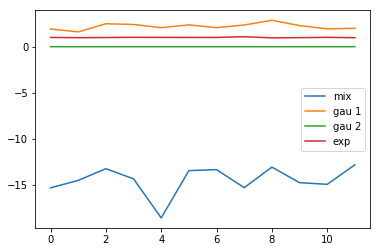

In [3]:
def test_get_one_dt():
    print (np.mean(get_one_dt('mix',   10000)))
    print (np.mean(get_one_dt('gau 1', 10000)))
    print (np.std (get_one_dt('gau 1', 10000)))
    print (np.mean(get_one_dt('gau 2', 10000)))
    print (np.std (get_one_dt('gau 2', 10000)))
    print (np.mean(get_one_dt('exp',   10000)))
    print (np.std (get_one_dt('exp',   10000)))
    
def test_get_dataset():
    distro = 'mix'
    datasize = 1000

    data_shuffle = get_dataset(distro, datasize, False)
    data_gen = get_dataset(distro, datasize, True)

    fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True)
    fig.set_size_inches(17, 12)
    num_bins = 100
    ax1.hist([dt for dt in data_shuffle], num_bins, alpha = 0.5, label=[str(i) for i in range(20)])
    ax1.legend()
    ax2.hist([dt for dt in data_gen[:3]], num_bins, alpha = 0.5, label=[str(i) for i in range(20)])
    ax2.legend()
    sizes = np.array([0.3, 0.2, 0.1, 0.15, 0.25]) * datasize
    ax3.hist(np.random.normal(2, 7.0, int(sizes[0])), 20, alpha = 0.5, label='0')
    ax3.hist(np.random.normal(0, 0.7, int(sizes[1])), 5, alpha = 0.5, label='1')
    ax3.hist(np.random.normal(36, 26, int(sizes[2])), 20, alpha = 0.5, label='2')
    ax3.hist(np.random.normal(5, 77, int(sizes[3])), 100, alpha = 0.5, label='3')
    ax3.hist(np.random.normal(-77, 7, int(sizes[4])), 20, alpha = 0.5, label='4')
    ax3.legend()
    plt.show()

    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    fig.set_size_inches(17, 12)
    ax1.hist(get_dataset('exp',   1000, False), num_bins, alpha = 0.5, label='exp')
    ax2.hist([dt for dt in (get_dataset('gau 1', 10000, True))[:3]], num_bins, alpha = 0.5, label='gau 1')
    ax3.hist(get_dataset('gau 2', 100000, False), num_bins, alpha = 0.5, label='gau 2')
    plt.show()
    
    distros = ['mix', 'gau 1', 'gau 2', 'exp']
    fig, ax = plt.subplots(1,1)
    for dis in distros:
        ax.plot([np.mean(gen) for gen in get_dataset(dis, 1000, True)], label=dis)
        ax.legend()
    plt.show()
    
    
test_get_dataset()  

In [4]:
tau_lst = np.random.uniform(0,1,5)

def test_q_batch():
    arr = get_q_batch(np.random.uniform(0,1, 10000), tau_lst)
    for i, tau in enumerate(tau_lst):
        if abs( arr[i] - tau) > 0.05:
            raise Exception('get_q_batch is wrong!')
    return True

def test_q_batches():
    test_q_batch()
    
    arr1 = get_q_batches(np.random.uniform(0,1,3456), tau_lst)
    for i, tau in enumerate(tau_lst):
            if abs(arr1[i] - tau) > 0.05:
                raise Exception('get_q_batch is wrong!')
    
    arr2 = get_q_batches(np.random.uniform(0, 1, (11, 1000)), tau_lst)
    for i, tau in enumerate(tau_lst):
        for arr in arr2:
            if abs(arr[i] - tau) > 0.05:
                raise Exception('get_q_batch is wrong!')
    return True
test_q_batches()

True

In [ ]:
## compute q_true for mix distribution
# q_true = np.zeros((10, len(tau_vals)))
# for i in range(10):
#     dataset = get_dataset('mix', 10000000, False)
#     print ('dataset done')
#     q_true[i] = get_q_batch(dataset, tau_vals)
# print (q_true)
# np.mean(q_true, axis=0)